In [2]:
# if you don't have any of these packages and you are using conda: type "conda install package" in terminal
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, log_loss
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import TruncatedSVD, PCA
from scipy.sparse import coo_matrix, hstack

#import scipy.sparse
from scipy import sparse as sp

#For visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

# For baseline 
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LeakyReLU

# For graph
import networkx as nx
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

# For testing
from sklearn.model_selection import train_test_split

# For modelling
from sklearn.metrics import precision_recall_curve, auc, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# For Evaluation
from sklearn.metrics import log_loss

# Data understanding

## Collect initial data 

**Task: Collect initial data**\
Acquire within the project the data (or access to the data) listed in the
project resources. This initial collection includes data loading if necessary
for data understanding. 

**Output: Initial data collection report**\
List 
* the **dataset** (or datasets) acquired 
* together with their **locations** within the project
* the **methods** used to acquire them
* and any **problems** encountered. 

In [3]:
file = 'training_sample.tsv'

column_names = ["text_tokens", 
                "hashtags", 
                "tweet_id", 
                "present_media", 
                "present_links", 
                "present_domains",
                "tweet_type", 
                "language", 
                "tweet_timestamp", 
                "engaged_with_user_id", 
                "engaged_with_user_follower_count",
                "engaged_with_user_following_count", 
                "engaged_with_user_is_verified", 
                "engaged_with_user_account_creation",
                "engaging_user_id", 
                "engaging_user_follower_count", 
                "engaging_user_following_count", 
                "engaging_user_is_verified",
                "engaging_user_account_creation", 
                "engaged_follows_engaging", 
                "reply_timestamp", "retweet_timestamp",
                "retweet_with_comment_timestamp", 
                "like_timestamp"]

df = pd.read_csv(file, header=None, names=column_names, delimiter='\x01')

## Describe data 

**Task: Describe data**\
Examine the “gross” or “surface” properties of the acquired data and
report on the results.

**Output: Data description report**\
Describe the data wich has been acquired, including: 
* the **format** of the data
* the **quantity** of data, for example number of records and fields in each table,
* the **identities** of the fields and any other surface features of the data which have been discovered. 

Does the data acquired satisfy the relevant requirements?

| Feature category    | Feature name                 | Feature dtype | Feature description                                                                           |
|---------------------|------------------------------|---------------|-----------------------------------------------------------------------------------------------|
|       | text_tokens                  |        |                              
| User features       | userId                       | string        | User identifier                                                                               |
| User features       | follower count               | int           | Number of followers of the user                                                               |
| User features       | following count              | int           | Number of accounts this user is following                                                     |
| User features       | is verified                  | bool          | Is the account verified?                                                                      |
| User features       | account creation             | timestamp     | in ms int Unix timestamp (in seconds) of the creation time of the account                     |
| Tweet features      | tweetId                      | string        | Tweet identifier                                                                              |
| Tweet features      | presentMedia                 | list[string]  | Tab-separated list of media types;  media type can be in (Photo, Video, Gif)                  |
| Tweet features      | presentLinks                 | list[string]  | Tab-separated list of links included in the tweet                                             |
| Tweet features      | presentDomains               | list[string]  | Tab-separated list of domains (e.g. twitter.com) included in the tweet                        |
| Tweet features      | tweetType                    | string        | Tweet type, can be either Retweet, Quote, Reply, or Toplevel                                  |
| Tweet features      | language                     | string        | Identifier corresponding to inferred language of the tweet                                    |
| Tweet features      | tweet timestamp              | int           | Unix timestamp, in seconds of the creation time of the Tweet                                  |
| Tweet features      | tweet tokens                 | list[int]     | Ordered list of Bert ids corresponding to Bert tokenization of Tweet text                     |
| Tweet features      | tweet hashtags               | list[string]  | Tab-separated list of hashtags present in the tweet                                           |
| Engagement features | reply engagement timestamp   | int           | Unix timestamp, in seconds, of the Reply engagement if one exists.                            |
| Engagement features | retweet engagement timestamp | int           | Unix timestamp, in seconds, of the Retweet engagement if one exists.                          |
| Engagement features | quote engagement timestamp   | int           | Unix timestamp, in seconds, of the Quote engagement if one exists.                            |
| Engagement features | like engagement timestamp    | int           | Unix timestamp, in seconds, of the Like engagement if one exists.                             |
| Engagement features | engageeFollowsEngager        | bool          | Does the account of the engaged tweet author follow the account that has made the engagement? |

To get a first feeling for the data the first 20 rows are printed below.

In [4]:
pd.set_option('display.max_columns', None)
print(df.shape)
display(df.head(20))

(80425, 24)


,text_tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,engaged_with_user_id,engaged_with_user_follower_count,engaged_with_user_following_count,engaged_with_user_is_verified,engaged_with_user_account_creation,engaging_user_id,engaging_user_follower_count,engaging_user_following_count,engaging_user_is_verified,engaging_user_account_creation,engaged_follows_engaging,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp
0,101\t56898\t137\t174\t63247\t10526\t131\t3197\...,NaN,3C21DCFB8E3FEC1CB3D2BFB413A78220,Video,NaN,NaN,Retweet,76B8A9C3013AE6414A3E6012413CDC3B,1581467323,D1AA2C85FA644D64346EDD88470525F2,737,706,False,1403069820,000046C8606F1C3F5A7296222C88084B,131,2105,False,1573978269,False,NaN,NaN,NaN,NaN
1,101\t102463\t10230\t10105\t21040\t10169\t12811...,NaN,3D87CC3655C276F1771752081423B405,NaN,BB422AA00380E45F312FD2CAA75F4960,92D397F8E0F1E77B36B8C612C2C51E23,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1580975391,4DC65AC7BD963DE1F7617C047C33DE99,52366425,2383,True,1230139136,00006047187D0D18598EF12A650E1DAC,22,50,False,1340673962,False,NaN,NaN,NaN,NaN
2,101\t56898\t137\t11255\t22037\t10263\t168\t111...,DB32BD91C2F1B37BE700F374A07FBC61,3701848B96AA740528A2B0E247777D7D,NaN,2423BA02A75DB2189335DDC3FB6B74A1,6D323BE93766E79BE423FAC5C28BE39B,Retweet,22C448FF81263D4BAF2A176145EE9EAD,1581257232,5C671539CB41B9807E209349B101E9FF,988,167,False,1530094483,0000648BAA193AE4C625DDF789B57172,251,719,False,1456473671,False,NaN,NaN,NaN,NaN
3,101\t13073\t28757\t106\t100\t14120\t131\t120\t...,NaN,18176C6AD2871729384062F073CCE94D,Video,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581164292,70B900BE17416923D1E236A38798F202,1228134,5413,False,1378699943,000071667F50BAFEA722A8E8284581E5,18,58,False,1378427564,False,NaN,NaN,NaN,1.581305e+09
4,101\t3460\t1923\t6632\t2824\t30368\t2179\t1881...,NaN,AF11AF01F842E7F120667B7B0B38676D,NaN,NaN,NaN,Quote,22C448FF81263D4BAF2A176145EE9EAD,1581233650,E94C0E9E8494F3D603F9D1A5C5242E3D,73,299,False,1549054499,00007745A6EE969F1A0F44B10DC17671,268,526,False,1252294800,False,NaN,NaN,NaN,NaN
5,101\t46242\t40751\t161\t100062\t10107\t10114\t...,NaN,4EC1C41302B820B2459337FE31859B16,NaN,BB79CD318A68247B64F0E0BE7AFD5A92,3896E26D12C903F0A00B6B1BE9A9BEA3,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581426841,959F94011E65010724E85D1B5CBAE18F,45488,6709,True,1415444172,00008C78BF1DDCC9FDCBAFFAF318A175,34,36,False,1538872824,False,NaN,NaN,NaN,NaN
6,101\t56898\t137\t10192\t11373\t10500\t131\t219...,NaN,5A943B66B4A519817AFCD1A72F9D42BF,NaN,NaN,NaN,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581289560,0062177976C63B01A6ED88EA32B16EE3,3205,1209,False,1480887745,000094A5EE8ADAC663B322D9D7E8D4F5,67,87,False,1540388888,True,NaN,NaN,NaN,NaN
7,101\t65724\t15619\t22859\t14120\t131\t120\t120...,NaN,E4EC2A529D2B45613E1BD71E7E8A33F0,Video,NaN,NaN,TopLevel,06D61DCBBE938971E1EA0C38BD9B5446,1581547705,3D051D82250859217FBA448B93E1957D,16385,640,True,1165379179,0000A7ECE87C3E55F4C0ECB86805DBCF,1273,271,False,1215849548,False,NaN,NaN,NaN,1.581548e+09
8,101\t100\t45031\t43804\t10121\t10146\t89387\t1...,NaN,43C1C8729853BF2C2CF58D0CFFE6F284,Photo,EF5D0A312E7A9BAEFBEA72A062E5F6CE,3183ACF54B4022B25B4157B81C174DD5,TopLevel,06D61DCBBE938971E1EA0C38BD9B5446,1581031483,033DB4138030ED8CF94BF33DEBB0CB39,3126043,105891,True,1235854449,0000FF30C15DDAFB6BB0FE2EE275CD6B,38,87,False,1540785155,False,NaN,NaN,NaN,NaN
9,101\t56898\t137\t26037\t91678\t168\t15734\t737...,NaN,D1FDD2ED8C6C80C2680E9746E70F5CFE,NaN,NaN,NaN,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581545364,D8F0311F254EF83F42719567A94B93DA,515,498,False,1555968118,0001075D4E0F573E579B79ADDFD54712,96,105,False,1283277064,True,NaN,NaN,NaN,1.581548e+09


It can be observed that 
* some columns seem to have a lot of NaN values. 
* Text tokens are tab-separated. 
* *Hashtags*, *present_links*, *present_domains*, *language* and *present_media* are hex-encoded and not human-readable
* timestamp-fields are ints and should be encoded to a readable format.

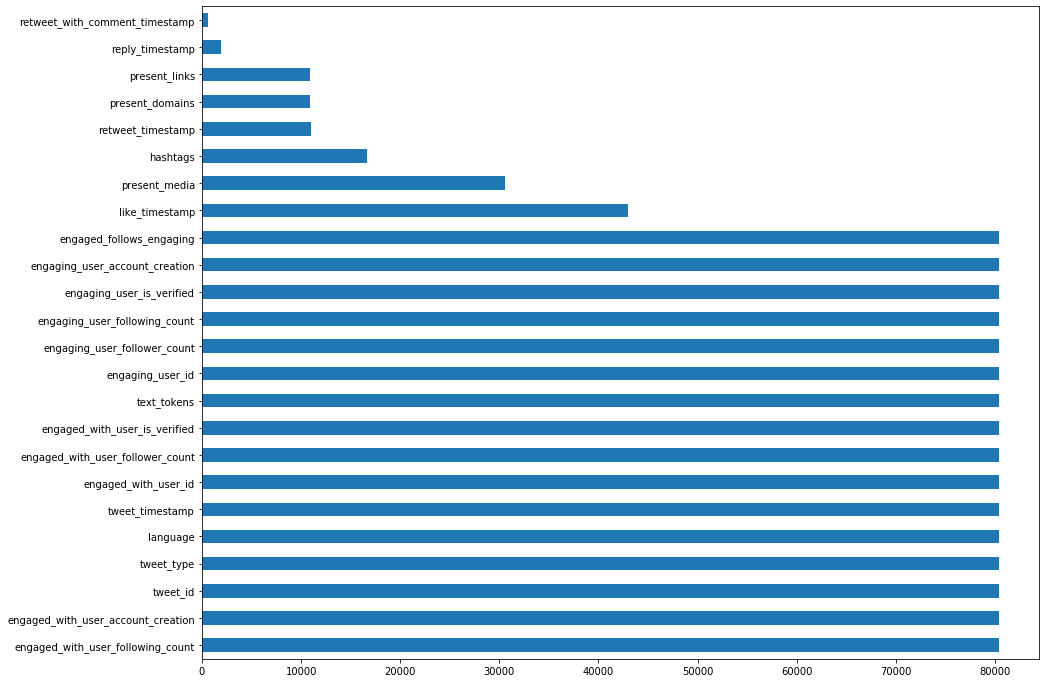

In [5]:
p_count = df.count() # to see missing values

fig, ax = plt.subplots(figsize=(15,12))
p_count.sort_values(ascending=False).plot.barh()

We can see that for half of the engagements there is no engagement timestamp at all. Exploration of the tweet type labels and the timestamp engagement variables might give further insights. 

## Explore data 


**Task: Explore data**\
This task tackles the data mining questions, which can be addressed
using querying, visualization and reporting. These include: 
* **distribution of key attributes**, for example the target attribute of a prediction task
* **relations** between pairs or small numbers of attributes
* results of **simple aggregations**
* properties of **significant sub-populations**
* **simple statistical analyses**. These analyses may address directly the data mining goals. they may also contribute to or refine the data description, quality reports, feed into the transformation and other data preparation needed for further analysis.


**Output: Data exploration report**\
Describe results of this task including 
* **first findings** or **initial hypothesis** and their **impact** on the remainder of the project. 
* If appropriate, include **graphs and plots**, which indicate data characteristics or lead to interesting **data subsets** for further examination.

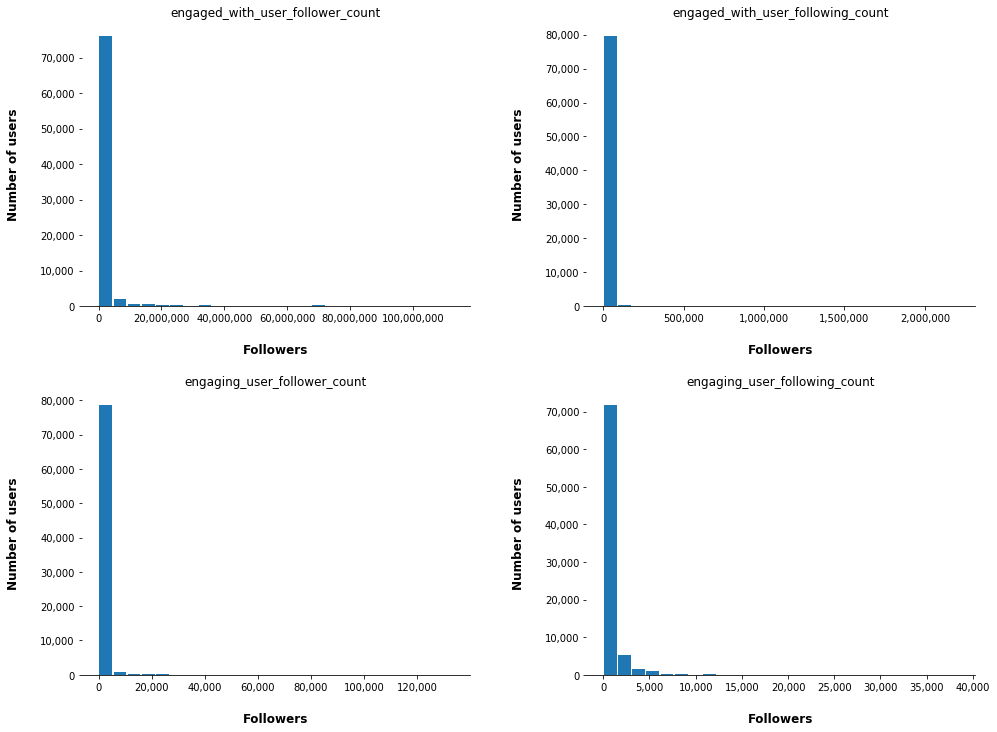

In [6]:
df_numeric = df[['engaging_user_follower_count',
                 'engaging_user_following_count',
                 'engaged_with_user_follower_count',
                 'engaged_with_user_following_count']]

fig, axes = plt.subplots(2, 2, figsize=(16,12))

df_numeric.hist(bins=25, 
                grid=False, 
                zorder=2, 
                rwidth=0.9,
                ax=axes)

for x in axes.reshape(-1): 
    #x.set_ylabel('test')
    
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Set x-axis label
    x.set_xlabel("Followers", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of users", labelpad=20, weight='bold', size=12)
    
    # Format tick labels
    x.ticklabel_format(style='plain')
    x.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))
    x.get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))


A powerlaw distribution can be observed. Needs to be transformed using a powertransformation to have a gaussian-like distribution in a later step.

As a next step we want to explore the missingness of the timestamp engagement variables as seen in the data description section. We will further explore for which tweet types they are missing.

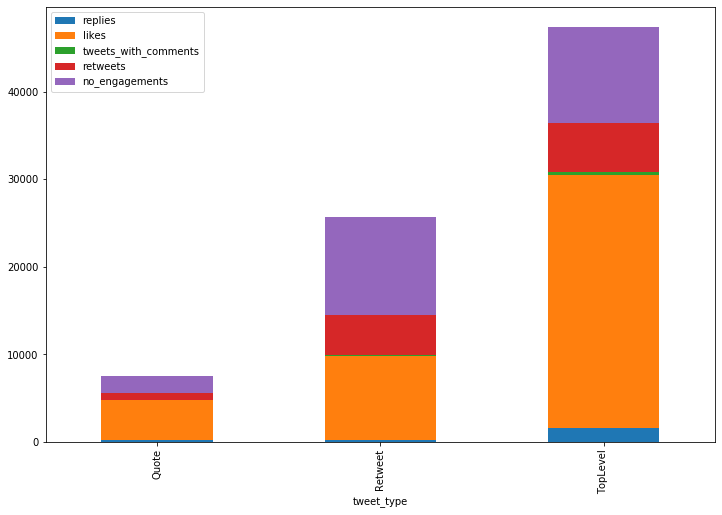

In [7]:
#'engaging_user_id', 'tweet_id'
# tweet_types according to description: Retweet, Quote, Reply, or Toplevel
df_subset = df[['tweet_type',
                 'tweet_id',
                 'reply_timestamp', 
                 'like_timestamp',
                 'retweet_with_comment_timestamp', 
                 'retweet_timestamp']]

df_explore = df_subset.groupby('tweet_type', as_index=False).agg({'reply_timestamp': 'count',
                                                                  'like_timestamp': 'count',
                                                                  'retweet_with_comment_timestamp': 'count', 
                                                                  'retweet_timestamp': 'count', 
                                                                  'tweet_id': 'count'})
# Rename columns
df_explore.columns = ['tweet_type',
                      'replies', 
                      'likes',
                      'tweets_with_comments', 
                      'retweets', 
                      'count_tweets']
                                                                  
df_explore['no_engagements'] = df_explore['count_tweets'] - df_explore[['replies',
                                           'likes',
                                           'tweets_with_comments', 
                                           'retweets',]].sum(axis=1)              
                                                                  
                                                                  
                                                                  
df_explore_plot = df_explore[['tweet_type',
                      'replies', 
                      'likes',
                      'tweets_with_comments', 
                      'retweets', 
                      'no_engagements']]

df_explore_plot.set_index('tweet_type', inplace=True)

fig, axes = plt.subplots(1,1,figsize=(12,8))
df_explore_plot.plot(kind='bar', 
                stacked=True, 
                ax=axes)
plt.show()

In [8]:
# boxplot of numeric variables

#fig, axes = plt.subplots(1, 1, figsize=(16,12))
#df.boxplot()

In [9]:
# qq-plot for numeric variables


## Verify data quality

**Task: Verify data quality**\
Examine the quality of the data, addressing questions such as: 
* is the data **complete** (does it cover all the cases required)? 
* Is it correct or does it contain **errors** and if there are errors **how common** are they?
* Are there **missing values** in the data? If so how are they represented, where do they occur and how common are they?


**Output: Data quality report**\
List the results of the data quality verification; if quality problems
exist, list possible solutions. Solutions to data quality problems
generally depend heavily on both data and business knowledge.

In [10]:
display(df)

,text_tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,engaged_with_user_id,engaged_with_user_follower_count,engaged_with_user_following_count,engaged_with_user_is_verified,engaged_with_user_account_creation,engaging_user_id,engaging_user_follower_count,engaging_user_following_count,engaging_user_is_verified,engaging_user_account_creation,engaged_follows_engaging,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp
0,101\t56898\t137\t174\t63247\t10526\t131\t3197\...,NaN,3C21DCFB8E3FEC1CB3D2BFB413A78220,Video,NaN,NaN,Retweet,76B8A9C3013AE6414A3E6012413CDC3B,1581467323,D1AA2C85FA644D64346EDD88470525F2,737,706,False,1403069820,000046C8606F1C3F5A7296222C88084B,131,2105,False,1573978269,False,NaN,NaN,NaN,NaN
1,101\t102463\t10230\t10105\t21040\t10169\t12811...,NaN,3D87CC3655C276F1771752081423B405,NaN,BB422AA00380E45F312FD2CAA75F4960,92D397F8E0F1E77B36B8C612C2C51E23,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1580975391,4DC65AC7BD963DE1F7617C047C33DE99,52366425,2383,True,1230139136,00006047187D0D18598EF12A650E1DAC,22,50,False,1340673962,False,NaN,NaN,NaN,NaN
2,101\t56898\t137\t11255\t22037\t10263\t168\t111...,DB32BD91C2F1B37BE700F374A07FBC61,3701848B96AA740528A2B0E247777D7D,NaN,2423BA02A75DB2189335DDC3FB6B74A1,6D323BE93766E79BE423FAC5C28BE39B,Retweet,22C448FF81263D4BAF2A176145EE9EAD,1581257232,5C671539CB41B9807E209349B101E9FF,988,167,False,1530094483,0000648BAA193AE4C625DDF789B57172,251,719,False,1456473671,False,NaN,NaN,NaN,NaN
3,101\t13073\t28757\t106\t100\t14120\t131\t120\t...,NaN,18176C6AD2871729384062F073CCE94D,Video,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581164292,70B900BE17416923D1E236A38798F202,1228134,5413,False,1378699943,000071667F50BAFEA722A8E8284581E5,18,58,False,1378427564,False,NaN,NaN,NaN,1.581305e+09
4,101\t3460\t1923\t6632\t2824\t30368\t2179\t1881...,NaN,AF11AF01F842E7F120667B7B0B38676D,NaN,NaN,NaN,Quote,22C448FF81263D4BAF2A176145EE9EAD,1581233650,E94C0E9E8494F3D603F9D1A5C5242E3D,73,299,False,1549054499,00007745A6EE969F1A0F44B10DC17671,268,526,False,1252294800,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80420,101\t56898\t137\t14796\t13711\t17617\t10161\t1...,FC7321735734C2FC8A3CAE30D266CD71,533F80610C8C2F4345517986B5BB58E5,NaN,NaN,NaN,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581212842,0BCA6643D664442CA7901690F5843C1A,1432450,1869,True,1220061361,06209A39A94A7AF33B253C1EFA2D52E5,32,443,False,1393279525,False,NaN,NaN,NaN,NaN
80421,101\t56898\t137\t11885\t11273\t40154\t10206\t1...,0FE0A5F06FA20E3C2CDE7F65ACA0046C,DAC3216BB2DC4747BB2CCBA6D253A308,NaN,NaN,NaN,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581533061,F44A5E2FD8B6A2ACF0A1B97D57ED3C92,29193,1434,False,1251330211,0620C4B9A7E8153DFD1ECEE5FE257F9C,54,755,False,1275826974,False,NaN,NaN,NaN,NaN
80422,101\t22800\t10531\t10124\t28780\t104939\t10230...,NaN,5F9EFD38F96180EAB6BAA74481C0E6FE,NaN,NaN,NaN,Quote,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581119848,95CD94FE6760E0A5C8A183D821B8460A,96,242,False,1559761254,062154E2ED505B1DA7A9883921E42838,31,65,False,1543720066,True,NaN,NaN,NaN,1.581122e+09
80423,101\t18249\t112\t187\t169\t16745\t26133\t117\t...,NaN,8CB10325EAAD5E121E686EF222B8598C,Photo,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581052325,9DF1155503CCA735A24A0B61E0445EF7,3134,5000,False,1452619872,0621E5EBF6FB229F57303B1FB6CF7B3A,7,100,False,1395188402,False,NaN,NaN,NaN,NaN


In [11]:
# check for duplicate rows

**Completeness**\
The dataset provided by twitter is sparse but the sparseness is justified and NaN values are not considered as missing due to technical errors but due to the nature of social networks where hashtags, media and links are not always part of a message (tweet).

**Possible errors**\
Why do some users have the exactly same timestamp for two types of engagements (e.g. row_id 80424)?

**Missing values** (only unjustified ones):
* more than 21.000 records have no timestamp values in any of the engagement variables. 

# Data Preparation

## Select data

**Task: Select data**\
Decide on the data to be used for analysis. Criteria include relevance
to the data mining goals, quality and technical constraints such as
limits on data volume or data types. Note that data selection covers
selection of attributes (columns) as well as selection of records (rows)
in a table.

**Output: Rationale for inclusion/exclusion**\
List the data to be included/excluded and the reasons for these decisions.

## Clean data

**Task: Clean data**\
Raise the data quality to the level required by the selected analysis
techniques. This may involve selection of clean subsets of the data, the
insertion of suitable defaults or more ambitious techniques such as the
estimation of missing data by modeling.


**Output: Data cleaning report**\
Describe what decisions and actions were taken to address the data
quality problems reported during the verify data quality task of the
data understanding phase. Transformations of the data for cleaning
purposes and the possible impact on the analysis results should be
considered.

Select only the ones where we have at least one engagement timestamp per tweet.
We do this to clean out the issue that rows with no engagement timestamps should not occur based on our understanding of business 

In [12]:
df.dropna(subset=['like_timestamp', 
                  'reply_timestamp', 
                  'retweet_timestamp', 
                  'retweet_with_comment_timestamp'],
          how='all',
          inplace=True)

## Construct data

**Task: Construct data**\
This task includes constructive data preparation operations such as the
production of derived attributes, entire new records or transformed
values for existing attributes.


**Outputs: Derived attributes**\
Derived attributes are new attributes that are constructed from one or more
existing attributes in the same record. Examples: area = length * width.
Generated records
Describe the creation of completely new records. Example: create
records for customers who made no purchase during the past year.
There was no reason to have such records in the raw data, but for
modeling purposes it might make sense to explicitly represent the fact
that certain customers made zero purchases.

### Enhance dataset with derived columns

We used the aggregation method count on several non-numerical variables to produce further independent variables on tweet level that might help us in predicting engagements. Also we encoded the engagement variables to a boolean type. \
The table below shows all the variables that the dataset will contain at the end of this section.

| Aggregation level | Name | Type | Description |
| --- | --- | --- | --- |
| tweet | has_media | bool | Indicates that is there any media type related to the tweet or not? (should be omitted later, it was just a helper for further extraction) |
| tweet | cnt_Photo | Integer | number of photo media in the tweet |
| tweet | cnt_Video | Integer | number of video media in the tweet|
| tweet | cnt_GIF | Integer | number of GIF media in the tweet |
| tweet | cnt_Other_media | Integer | (maybe it's impossible) if there is an unknown media type, it will be counted |
| tweet | cnt_Hashtags | Integer | Count the number of hashtags in each tweet |
| tweet | cnt_Domains | Integer | Count the number of domains in each tweet |
| tweet | cnt_Links | Integer | Count the number of links in each tweet |
| tweet | cnt_Words_In_Tweet | Integer | Count the number of words in the tweet |
| tweet | is_like | bool | indicates that was there a like by the engaging user on the tweet (decided on that is there timestamp exists or not) |
| tweet | is_reply | bool | indicates that was there a reply by the engaging user on the tweet (decided on that is there timestamp exists or not) |
| tweet | is_retweet | bool | indicates that was there a retweet by the engaging user on the tweet (decided on that is there timestamp exists or not) |
| tweet | is_retweet_with_comment | bool | indicates that was there a retweet with comment by the engaging user on the tweet (decided on that is there timestamp exists or not) |
| user | cnt_likes | Integer | not yet implemented |
| user | cnt_replies | Integer | not yet implemented |
| user | cnt_retweets | Integer | not yet implemented |
| user | cnt_retweets_with_comment | Integer | not yet implemented |
| user | cnt_tweets | Integer | not yet implemented |

First we enhance the dataset with **aggregations on tweet level**. 

In [13]:
# helper variable
df['has_media'] = df['present_media'].notna()

# Count the different media types for every tweet
photoCnt = []
videoCnt = []
gifCnt = []
other = []

for d,b in zip(df['present_media'],  df['has_media']):
    if b is True:
        pht = d.count("Photo")
        video = d.count("Video")
        gif  = d.count("GIF")
        
        photoCnt.append(pht)
        videoCnt.append(video)
        gifCnt.append(gif)

        if len(str(d).split()) != int(pht + video + gif):
             other.append(len(str(d).split()) - int(pht + video + gif))
        else:
             other.append(0)
    else:
        photoCnt.append(0)
        videoCnt.append(0)
        gifCnt.append(0)
        other.append(0)
        
df['cnt_Photo'] = photoCnt
df['cnt_Video'] = videoCnt
df['cnt_GIF'] = gifCnt
df['cnt_Other_Media'] = other


# Count the number of hashtags, links, domains and words in each tweet
df['cnt_Hashtags'] = df.apply(lambda x : len(str(x['hashtags']).split()) if str(x['hashtags']) != "nan" else 0,axis=1)
df['cnt_Links'] = df.apply(lambda x : len(str(x['present_links']).split()) if str(x['present_links']) != "nan" else 0,axis=1)
df['cnt_Domains'] = df.apply(lambda x : len(str(x['present_domains']).split()) if str(x['present_domains']) != "nan" else 0,axis=1)
df['cnt_Words_In_Tweet'] = df.apply(lambda x : len(str(x['text_tokens']).split()) if str(x['text_tokens']) != "nan" else 0,axis=1)

Now, as we derived some new attributes we also want to explore them. We are interested in the proportion of words, hashtags, links and domains in tweets


In [14]:
#dfCountToPlot = df[['cnt_Words_In_Tweet', 'cnt_Hashtags',  'cnt_Links', 'cnt_Domains']]
#plt.plot(dfCountToPlot)
#plt.ylabel('Words in tweets') # previously called: some numbers
#plt.show()

# Takes very long to compute! maybe histogram would be better


We encode the **engagement types as booleans** as we are not going to predict timestamps but probabilities of engagements.

In [15]:
df['is_reply'] = df['reply_timestamp'].notna()
df['is_like'] = df['like_timestamp'].notna()
df['is_retweet_with_comment'] = df['retweet_with_comment_timestamp'].notna()
df['is_retweet'] = df['retweet_timestamp'].notna()

In the following cell we create some **user level aggregations**, namely, counts for each dependent variable and tweet counts. 

In [16]:
# Counts on user level

# engagement types counts
df_user_variables_counts = df[['engaging_user_id',
                               'is_reply', 
                               'is_like',
                               'is_retweet_with_comment', 
                               'is_retweet']].groupby(['engaging_user_id'], as_index=False).sum()
df_user_variables_counts.columns = ['engaging_user_id', 
                                    'cnt_engaging_user_replies',
                                    'cnt_engaging_user_likes',
                                    'cnt_engaging_user_retweets_with_comments',
                                    'cnt_engaging_user_retweets']
# tweet counts
df_user_tweet_counts = df[['tweet_id', 
                           'engaging_user_id']].groupby(['engaging_user_id'],
                                                        as_index=False).count().sort_values(by='tweet_id',
                                                                                            ascending=False)
df_user_tweet_counts.columns = ['engaging_user_id', 
                                    'cnt_user_tweets']

# Merge both derived dataframes to main data frame
df = df.merge(df_user_variables_counts, 
         how='left', 
         left_on='engaging_user_id', 
         right_on='engaging_user_id')


df = df.merge(df_user_tweet_counts, 
         how='left', 
         left_on='engaging_user_id', 
         right_on='engaging_user_id')

#df.join(df_user_variables_counts, on='engaging_user_id', how='left')

let us look at some distribution of the new variables. It is not surprising that we again encounter a skewed normal distribution

Text(0, 0.5, 'number of users')

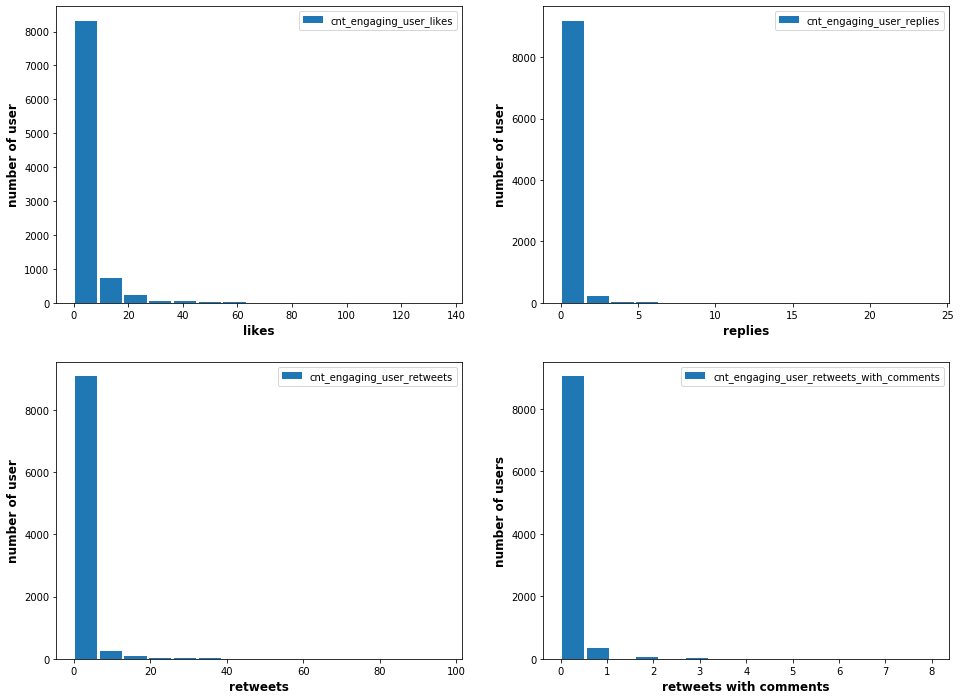

In [17]:
fig, axes = plt.subplots(2,2,figsize=(16,12))


df_user_variables_counts[['engaging_user_id', 'cnt_engaging_user_likes']].plot(kind='hist', 
                                                                               bins=15, 
                                                                               ax=axes[0,0],
                                                                               zorder=2,
                                                                               rwidth=0.9)
axes[0,0].set_xlabel("likes", weight='bold', size=12)
axes[0,0].set_ylabel("number of user", weight='bold', size=12)

df_user_variables_counts[['engaging_user_id', 'cnt_engaging_user_replies']].plot(kind='hist', 
                                                                               bins=15, 
                                                                               ax=axes[0,1],
                                                                               zorder=2,
                                                                               rwidth=0.9)
axes[0,1].set_xlabel("replies", weight='bold', size=12)
axes[0,1].set_ylabel("number of user", weight='bold', size=12)

df_user_variables_counts[['engaging_user_id', 'cnt_engaging_user_retweets']].plot(kind='hist', 
                                                                               bins=15, 
                                                                               ax=axes[1,0],
                                                                               zorder=2,
                                                                               rwidth=0.9)
axes[1,0].set_xlabel("retweets", weight='bold', size=12)
axes[1,0].set_ylabel("number of user", weight='bold', size=12)

df_user_variables_counts[['engaging_user_id', 'cnt_engaging_user_retweets_with_comments']].plot(kind='hist', 
                                                                               bins=15, 
                                                                               ax=axes[1,1],
                                                                               zorder=2,
                                                                               rwidth=0.9)
axes[1,1].set_xlabel("retweets with comments", weight='bold', size=12)
axes[1,1].set_ylabel("number of users", weight='bold', size=12)


Now let us also encode the timestamps to day times. This might be valuable for predicting the engagement as engagements might vary during different day times.

<ipython-input-18-99e4e8231619>:23: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



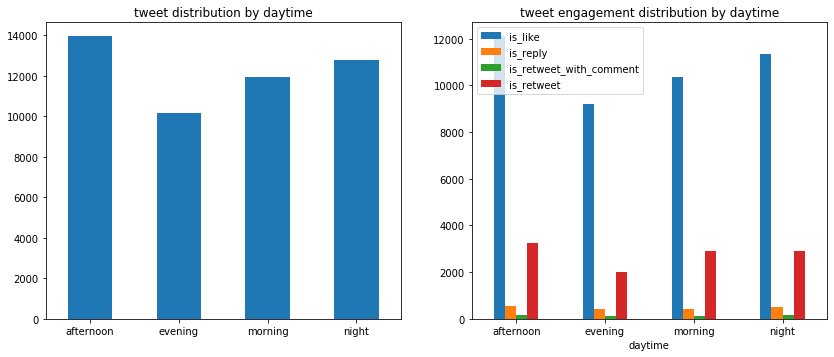

In [18]:
# Converting tweet timestamp into categorical (morning, afternoon, evening, night) variable
from datetime import datetime, timezone
def get_part_of_day(timestamp):
    t=datetime.fromtimestamp(timestamp)
    hour=int(t.strftime('%H'))
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
)
df['daytime'] = df.apply(lambda x: get_part_of_day(x['tweet_timestamp']), axis=1)
df.head()

# Visualizing the distribution of tweet times
plt.figure()
ax1 = plt.subplot(221)
df['daytime'].value_counts().sort_index().plot(kind='bar',rot=0,ax=ax1,figsize=(14, 12),title='tweet distribution by daytime')
ax2 = plt.subplot(222)
df.groupby('daytime')['is_like','is_reply','is_retweet_with_comment','is_retweet'].sum().sort_index().plot.bar(rot=0,ax=ax2,figsize=(14, 12),title='tweet engagement distribution by daytime')

### T4. Extract the Social Network
* Twitter Social Network is directional (follower – following) 
* parse the `engaged_follows_engaging` field: each example gives you an edge
* Create the adjacency matrix representation of the social graph
* If an edge exists between two users, 0 otherwise
* how can you use this information?

In [19]:
unique_user_ids = df['engaging_user_id'].append(df['engaged_with_user_id']).unique()

m = len(unique_user_ids)

userId_to_userIDX = dict(zip(unique_user_ids, range(m)))
userIDX_to_userId = dict(zip(range(m), unique_user_ids))

e_df = df[df['engaged_follows_engaging']][['engaging_user_id', 'engaged_with_user_id', 'engaged_follows_engaging']]

e_df['engaging_user_idx'] = e_df['engaging_user_id'].map(userId_to_userIDX)
e_df['engaged_with_user_idx'] = e_df['engaged_with_user_id'].map(userId_to_userIDX)

e_df.sort_values(by=['engaging_user_idx'], inplace = True)
e_df.drop_duplicates(inplace = True)
e_df.reset_index(drop = True, inplace = True)

display(e_df.head())

,engaging_user_id,engaged_with_user_id,engaged_follows_engaging,engaging_user_idx,engaged_with_user_idx
0,0001075D4E0F573E579B79ADDFD54712,D8F0311F254EF83F42719567A94B93DA,True,2,9477
1,0001075D4E0F573E579B79ADDFD54712,C79E33E69F3713637434A44A12ECA2FD,True,2,30646
2,00012C876C1622AE995D8D21A69DD6C9,82914F8A54E433E1DC4337CF335EFB17,True,3,9478
3,00012C876C1622AE995D8D21A69DD6C9,05D02FE23C9D1AD7B5560EBC5ABF1834,True,3,22643
4,00012C876C1622AE995D8D21A69DD6C9,A7678FF012972AE3D5757298392D08E2,True,3,29378


In [20]:
SN = sp.csr_matrix((e_df.engaged_follows_engaging, (e_df.engaging_user_idx, e_df.engaged_with_user_idx)), shape=(m, m))
SN.shape

(43561, 43561)

Using the adjacency matrix, we can create a graph that represents the connection (following) between the users. Remember: the "engaged_follows_engaging" attribute represents whether the user who created the engaded tweet follows the user who is engaging. Then we can have a graph with 65963 nodes and 24234 edges.

In [21]:
G = nx.from_scipy_sparse_matrix(SN,parallel_edges=True,create_using=nx.DiGraph())
G=G.reverse()
print("{} nodes, {} edges".format(len(G), nx.number_of_edges(G)))

43561 nodes, 15594 edges


#### Calculating centralities

In [22]:
in_degree = dict(G.in_degree())
c_df=pd.DataFrame(sorted(in_degree.items(), key=lambda x: x[1], reverse=True),columns=['id', 'in_degree'])

# map back ids to user ids from the original dataframe
c_df['id']=c_df['id'].map(userIDX_to_userId)

# create a dictionary of user ids and centrality measures to speed-up mapping with the original df
c_dict=c_df.set_index('id').T.to_dict('list')
df['engaging_user_centrality']=df['engaging_user_id'].map(c_dict).apply(lambda x: x[0])
df.head()

,text_tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,engaged_with_user_id,engaged_with_user_follower_count,engaged_with_user_following_count,engaged_with_user_is_verified,engaged_with_user_account_creation,engaging_user_id,engaging_user_follower_count,engaging_user_following_count,engaging_user_is_verified,engaging_user_account_creation,engaged_follows_engaging,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp,has_media,cnt_Photo,cnt_Video,cnt_GIF,cnt_Other_Media,cnt_Hashtags,cnt_Links,cnt_Domains,cnt_Words_In_Tweet,is_reply,is_like,is_retweet_with_comment,is_retweet,cnt_engaging_user_replies,cnt_engaging_user_likes,cnt_engaging_user_retweets_with_comments,cnt_engaging_user_retweets,cnt_user_tweets,daytime,engaging_user_centrality
0,101\t13073\t28757\t106\t100\t14120\t131\t120\t...,NaN,18176C6AD2871729384062F073CCE94D,Video,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581164292,70B900BE17416923D1E236A38798F202,1228134,5413,False,1378699943,000071667F50BAFEA722A8E8284581E5,18,58,False,1378427564,False,NaN,NaN,NaN,1.581305e+09,True,0,1,0,0,0,0,0,22,False,True,False,False,0.0,1.0,0.0,0.0,1,afternoon,0
1,101\t65724\t15619\t22859\t14120\t131\t120\t120...,NaN,E4EC2A529D2B45613E1BD71E7E8A33F0,Video,NaN,NaN,TopLevel,06D61DCBBE938971E1EA0C38BD9B5446,1581547705,3D051D82250859217FBA448B93E1957D,16385,640,True,1165379179,0000A7ECE87C3E55F4C0ECB86805DBCF,1273,271,False,1215849548,False,NaN,NaN,NaN,1.581548e+09,True,0,1,0,0,0,0,0,20,False,True,False,False,0.0,1.0,0.0,0.0,1,night,0
2,101\t56898\t137\t26037\t91678\t168\t15734\t737...,NaN,D1FDD2ED8C6C80C2680E9746E70F5CFE,NaN,NaN,NaN,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581545364,D8F0311F254EF83F42719567A94B93DA,515,498,False,1555968118,0001075D4E0F573E579B79ADDFD54712,96,105,False,1283277064,True,NaN,NaN,NaN,1.581548e+09,False,0,0,0,0,0,0,0,47,False,True,False,False,0.0,5.0,0.0,0.0,5,night,2
3,101\t10725\t14015\t14107\t13028\t10114\t12688\...,9887C2F9C8FFECE3524054D91E871F84,614DA04CC5C49B502310309E230741CC,NaN,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581157261,82914F8A54E433E1DC4337CF335EFB17,2161,1710,False,1514464025,00012C876C1622AE995D8D21A69DD6C9,175,318,False,1576071640,True,NaN,1.581157e+09,NaN,NaN,False,0,0,0,0,1,0,0,44,False,False,False,True,0.0,3.0,0.0,11.0,12,morning,7
4,101\t1925\t11662\t111801\t14244\t2452\t3709\t4...,NaN,F71F2C56FFBD356A32C9493870010FDE,NaN,NaN,NaN,TopLevel,22C448FF81263D4BAF2A176145EE9EAD,1581082338,2CC52E11FF9958FA3F1F51FDB257CF13,254614,2,False,1534083363,000135525DC69CAFAABADDEC49A983B6,69,153,False,1502882662,False,NaN,NaN,NaN,1.581089e+09,False,0,0,0,0,0,0,0,105,False,True,False,False,0.0,3.0,0.0,0.0,3,afternoon,0


Encoding centrality measures to True or False bool variable (True means the user is important in the network, having degree centrality value greater than the median) and check their distribution grouped by engagement type.

In [23]:
display(df['engaging_user_centrality'].median())
df['is_engaging_user_centrality']=df['engaging_user_centrality']>df['engaging_user_centrality'].median()
df.head()

2.0

,text_tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,engaged_with_user_id,engaged_with_user_follower_count,engaged_with_user_following_count,engaged_with_user_is_verified,engaged_with_user_account_creation,engaging_user_id,engaging_user_follower_count,engaging_user_following_count,engaging_user_is_verified,engaging_user_account_creation,engaged_follows_engaging,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp,has_media,cnt_Photo,cnt_Video,cnt_GIF,cnt_Other_Media,cnt_Hashtags,cnt_Links,cnt_Domains,cnt_Words_In_Tweet,is_reply,is_like,is_retweet_with_comment,is_retweet,cnt_engaging_user_replies,cnt_engaging_user_likes,cnt_engaging_user_retweets_with_comments,cnt_engaging_user_retweets,cnt_user_tweets,daytime,engaging_user_centrality,is_engaging_user_centrality
0,101\t13073\t28757\t106\t100\t14120\t131\t120\t...,NaN,18176C6AD2871729384062F073CCE94D,Video,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581164292,70B900BE17416923D1E236A38798F202,1228134,5413,False,1378699943,000071667F50BAFEA722A8E8284581E5,18,58,False,1378427564,False,NaN,NaN,NaN,1.581305e+09,True,0,1,0,0,0,0,0,22,False,True,False,False,0.0,1.0,0.0,0.0,1,afternoon,0,False
1,101\t65724\t15619\t22859\t14120\t131\t120\t120...,NaN,E4EC2A529D2B45613E1BD71E7E8A33F0,Video,NaN,NaN,TopLevel,06D61DCBBE938971E1EA0C38BD9B5446,1581547705,3D051D82250859217FBA448B93E1957D,16385,640,True,1165379179,0000A7ECE87C3E55F4C0ECB86805DBCF,1273,271,False,1215849548,False,NaN,NaN,NaN,1.581548e+09,True,0,1,0,0,0,0,0,20,False,True,False,False,0.0,1.0,0.0,0.0,1,night,0,False
2,101\t56898\t137\t26037\t91678\t168\t15734\t737...,NaN,D1FDD2ED8C6C80C2680E9746E70F5CFE,NaN,NaN,NaN,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581545364,D8F0311F254EF83F42719567A94B93DA,515,498,False,1555968118,0001075D4E0F573E579B79ADDFD54712,96,105,False,1283277064,True,NaN,NaN,NaN,1.581548e+09,False,0,0,0,0,0,0,0,47,False,True,False,False,0.0,5.0,0.0,0.0,5,night,2,False
3,101\t10725\t14015\t14107\t13028\t10114\t12688\...,9887C2F9C8FFECE3524054D91E871F84,614DA04CC5C49B502310309E230741CC,NaN,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581157261,82914F8A54E433E1DC4337CF335EFB17,2161,1710,False,1514464025,00012C876C1622AE995D8D21A69DD6C9,175,318,False,1576071640,True,NaN,1.581157e+09,NaN,NaN,False,0,0,0,0,1,0,0,44,False,False,False,True,0.0,3.0,0.0,11.0,12,morning,7,True
4,101\t1925\t11662\t111801\t14244\t2452\t3709\t4...,NaN,F71F2C56FFBD356A32C9493870010FDE,NaN,NaN,NaN,TopLevel,22C448FF81263D4BAF2A176145EE9EAD,1581082338,2CC52E11FF9958FA3F1F51FDB257CF13,254614,2,False,1534083363,000135525DC69CAFAABADDEC49A983B6,69,153,False,1502882662,False,NaN,NaN,NaN,1.581089e+09,False,0,0,0,0,0,0,0,105,False,True,False,False,0.0,3.0,0.0,0.0,3,afternoon,0,False


We can see that the centrality of the engaging user has some impact on the probability of the engagement, since there are less not important users in the dataset, but we get higher numbers for the engagement types among the important users. 

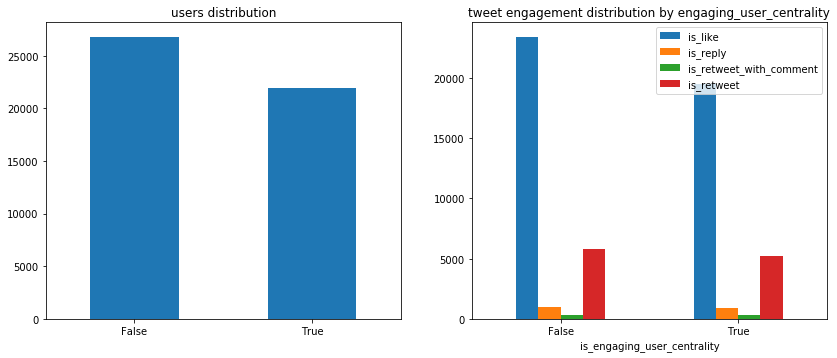

In [44]:
plt.figure()
ax1 = plt.subplot(221)
df['is_engaging_user_centrality'].value_counts().sort_index().plot(kind='bar',rot=0,ax=ax1,figsize=(14, 12),title='users distribution')
ax2 = plt.subplot(222)
df.groupby('is_engaging_user_centrality')[['is_like','is_reply','is_retweet_with_comment','is_retweet']].sum().sort_index().plot.bar(rot=0,ax=ax2,figsize=(14, 12),title='tweet engagement distribution by engaging_user_centrality')
plt.show()

#### Network visualization

In [25]:
# has yet to be checked and confirmed for merging

## Format data

**Task: Format data**\
Formatting transformations refer to primarily syntactic modifications
made to the data that do not change its meaning, but might be required
by the modeling tool.


**Output: Reformatted data**\
Some tools have requirements on the order of the attributes, such as
the first field being a unique identifier for each record or the last field
being the outcome field the model is to predict.
It might be important to change the order of the records in the dataset.
Perhaps the modeling tool requires that the records be sorted according
to the value of the outcome attribute. A common situation is that the
records of the dataset are initially ordered in some way but the modeling
algorithm needs them to be in a fairly random order. For example, when
using neural networks it is generally best for the records to be presented
in a random order although some tools handle this automatically without explicit user intervention

In [26]:
# Parse attributes containing tab-separated lists into lists.
df['text_tokens'] = df['text_tokens'].str.split('\t')

def to_hex_list(x):
    output = str(x).split('\t')
#     output = [int(val, 16) for val in str(x).split('\t')] 
    return output

cols_to_process = ['hashtags', 'present_media', 'present_links', 'present_domains']

for col in cols_to_process:  
    df[col] = df[col].apply(lambda x: to_hex_list(x) if isinstance(x, str)  else x)


# Transform raw timestamps into human-readable timestamps.
cols_to_process = ['tweet_timestamp', 'engaging_user_account_creation', 'reply_timestamp', 'retweet_timestamp', 'retweet_with_comment_timestamp', 'like_timestamp']

for col in cols_to_process:  
    df[col] = df[col].apply(lambda x: pd.Timestamp(x, unit='s'))

In [27]:
df.columns

Index(['text_tokens', 'hashtags', 'tweet_id', 'present_media', 'present_links',
       'present_domains', 'tweet_type', 'language', 'tweet_timestamp',
       'engaged_with_user_id', 'engaged_with_user_follower_count',
       'engaged_with_user_following_count', 'engaged_with_user_is_verified',
       'engaged_with_user_account_creation', 'engaging_user_id',
       'engaging_user_follower_count', 'engaging_user_following_count',
       'engaging_user_is_verified', 'engaging_user_account_creation',
       'engaged_follows_engaging', 'reply_timestamp', 'retweet_timestamp',
       'retweet_with_comment_timestamp', 'like_timestamp', 'has_media',
       'cnt_Photo', 'cnt_Video', 'cnt_GIF', 'cnt_Other_Media', 'cnt_Hashtags',
       'cnt_Links', 'cnt_Domains', 'cnt_Words_In_Tweet', 'is_reply', 'is_like',
       'is_retweet_with_comment', 'is_retweet', 'cnt_engaging_user_replies',
       'cnt_engaging_user_likes', 'cnt_engaging_user_retweets_with_comments',
       'cnt_engaging_user_retweets', 

# Modelling

## Variable selection

Before we continue splitting the data into train and test sets we need to define our dependent and independent variables first. We saw in the data exploration and furthermore in the data preparation section that many numerical attributes that are included in our dataset (original and enhanced) are skewed. That is why we first need to transform those variables and aim for a gaussian distribution.

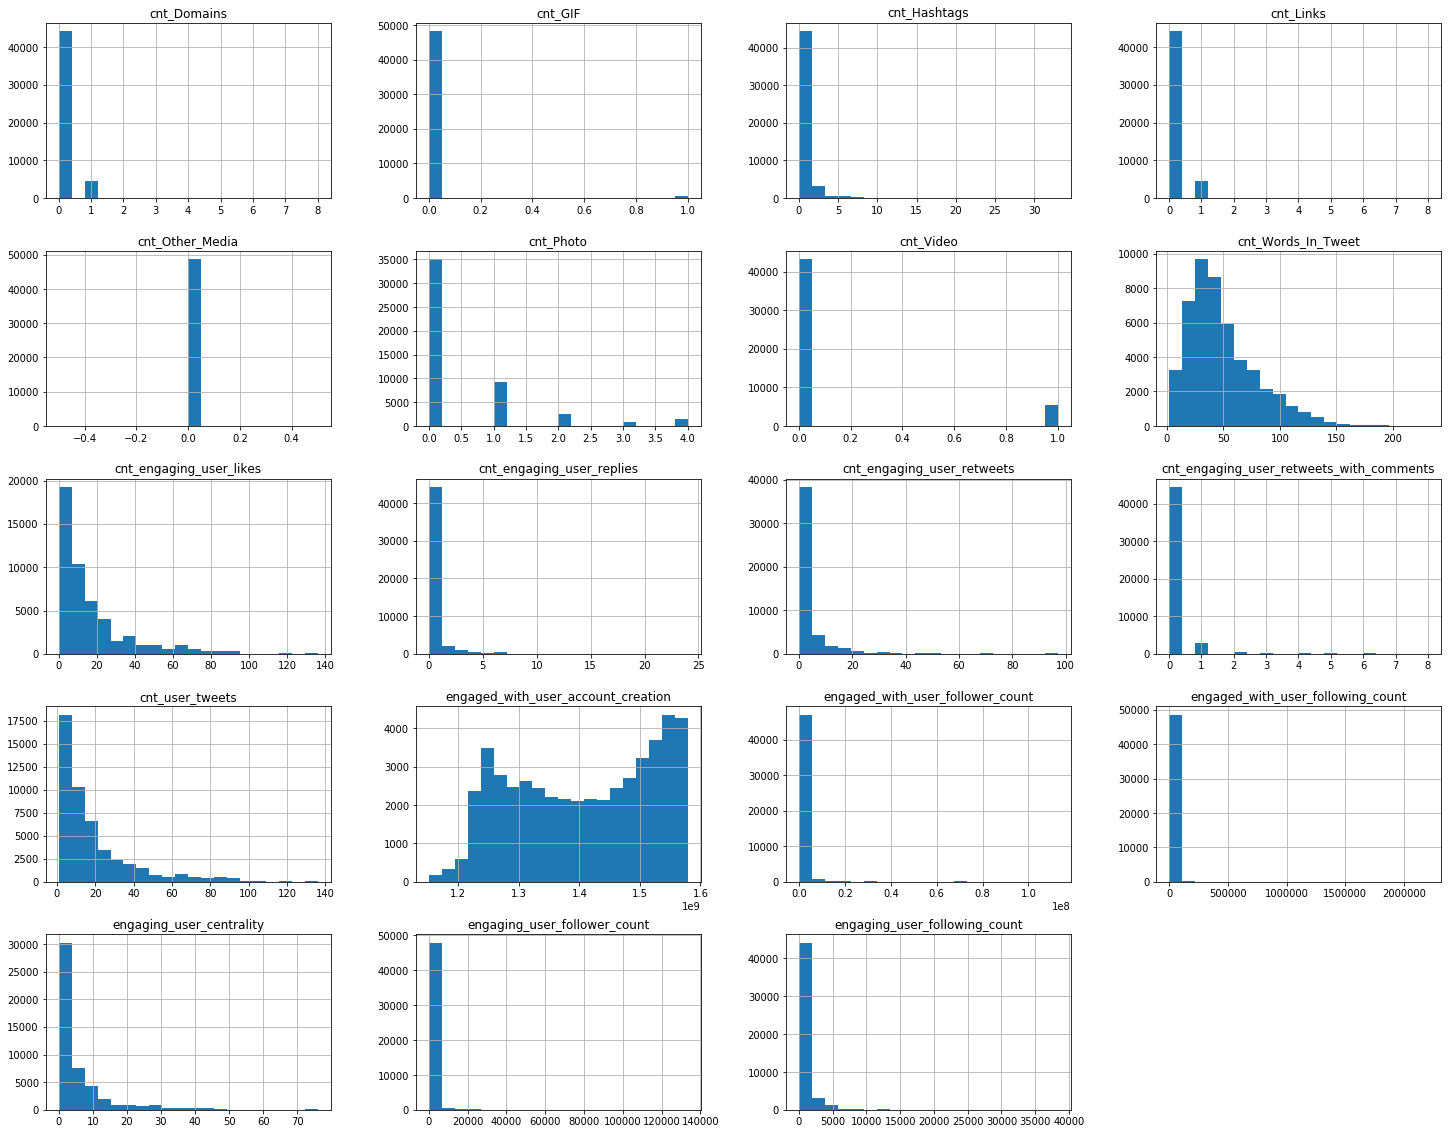

In [28]:
# First, we exclude helper variables and variables that are certainly not going to be used
columns_to_exclude = ['has_media',
                     # 'reply_timestamp', 
                     # 'like_timestamp', 
                     # 'retweet_timestamp', 
                     # 'retweet_with_comment_timestamp'
                     ]
reduced_variable_set = list(set(df.columns.to_list()) - set(columns_to_exclude))
df = df[reduced_variable_set]

# Now let us split the variable sets based on their categories
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = df.select_dtypes(include=numerics).columns.tolist()

timestamp_cols = ['tweet_timestamp', 'engaging_user_account_creation']

categorical_cols = ['tweet_type', 'language', 
                    'engaged_with_user_is_verified', 'engaging_user_is_verified', 'engaged_follows_engaging',
                   'is_engaging_user_centrality', 'daytime']

id_cols = ['tweet_id', 'engaged_with_user_id', 'engaging_user_id']


response_cols = ['reply_timestamp', 
                 'retweet_timestamp',
                 'retweet_with_comment_timestamp', 
                 'like_timestamp'
                ]

response_cols_bool = ['is_reply', 
                 'is_retweet',
                 'is_retweet_with_comment', 
                 'is_like'
                ]

tweet_feature_cols = ['text_tokens', 'hashtags', 'present_media', 'present_links', 'present_domains']


# We show the distribution of all numeric variables
df[numeric_cols].hist(bins=20, figsize=(25,20))
plt.show()

/home/filip/anaconda3/envs/uni/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning:

divide by zero encountered in log



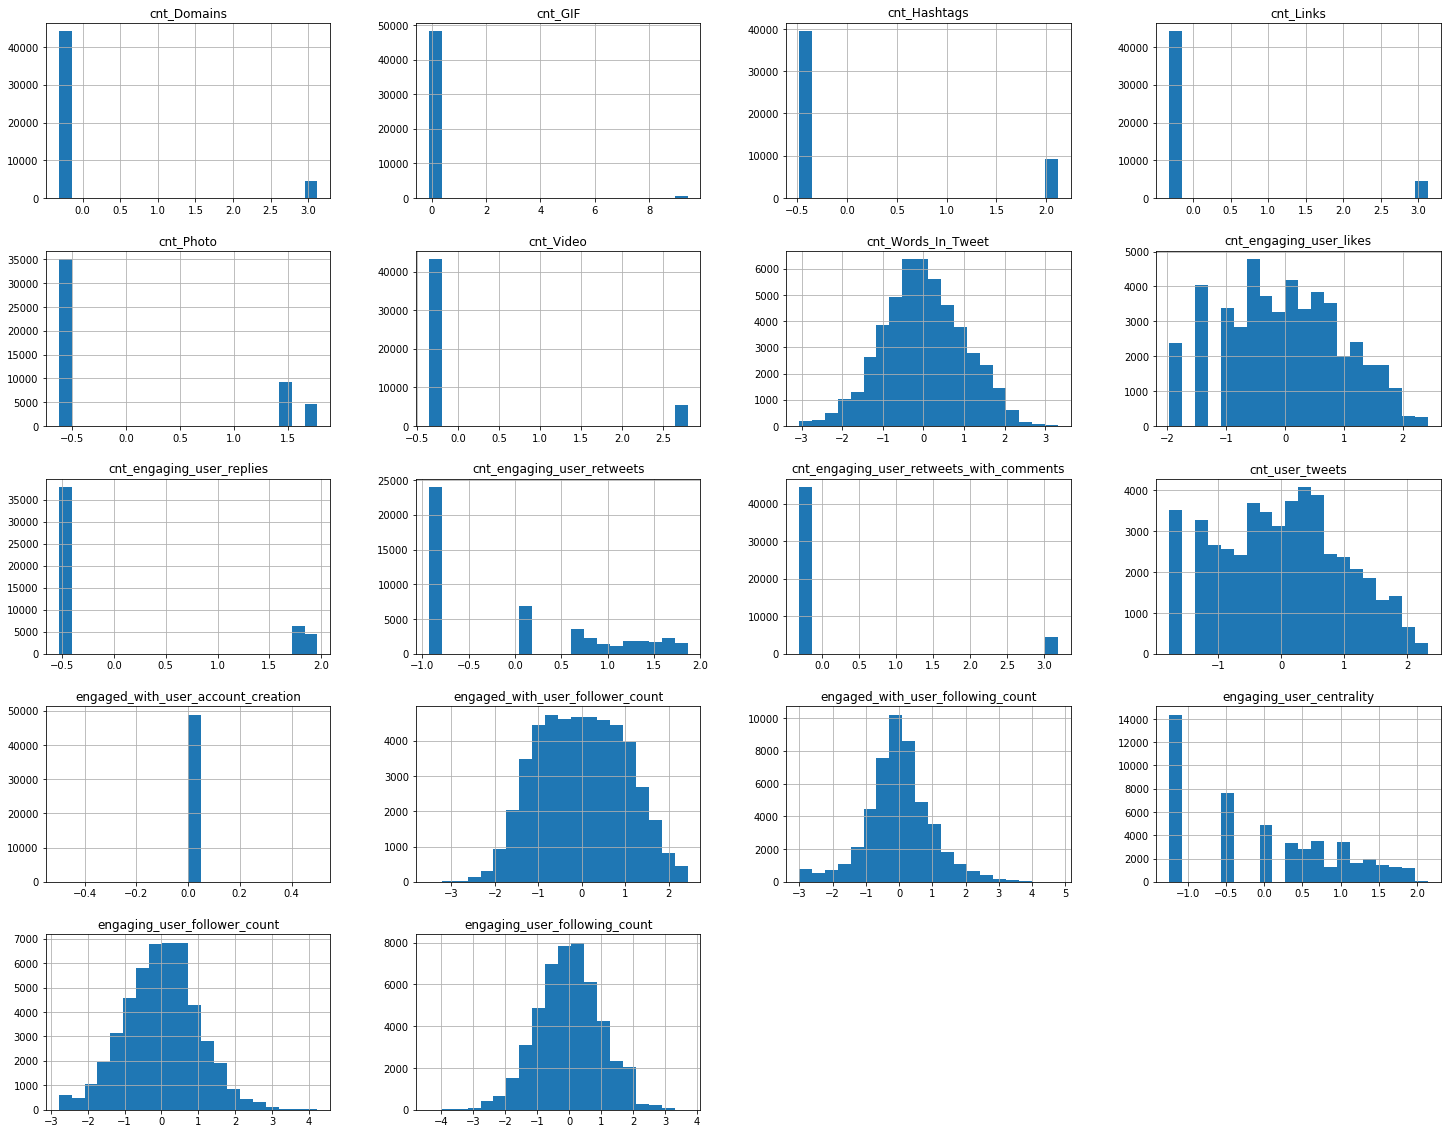

In [29]:
from sklearn.preprocessing import PowerTransformer,RobustScaler

# We exclude further variables that would yield no information gain (have no variance)
columns_to_exclude = ['cnt_Other_Media']
df = df[df.columns.difference(columns_to_exclude)] # exclude from dataframe
numeric_cols = list(set(numeric_cols) - set(columns_to_exclude)) # exclude from numeric variables

# We scale the variables ...
scaler = PowerTransformer()

# df_transformed = df.copy()
columns_to_transform = numeric_cols
scaler.fit(df[columns_to_transform])
df[columns_to_transform] = scaler.transform(df[columns_to_transform])

# ... and show the distributions again
df[columns_to_transform].hist(bins=20, figsize=(25,20))
plt.show()

# TODO: solve divide by zero problem

After applying the powertransformer we can observe that some variables got transformed well into a gaussian-like distribution and others did not. We will again exclude those which did not yield any better results.

In [30]:
numeric_cols = ['cnt_Words_In_Tweet', 'cnt_engaging_user_likes', 'cnt_user_tweets', 
               'engaged_with_user_follower_count', 'engaged_with_user_following_count', 
               'engaging_user_centrality', 'engaging_user_follower_count', 'engaging_user_following_count']

In [31]:
'''
Encodes a numeric column to categoric.

Parameters:
    x (pd.Series): The pandas Series which shall be tranformed.
    nq (int): The number of buckets onto which the column should be distrubed.

Returns:
    A pd.Series containing a categorical encoding of the given numeric column.
'''
def numeric_cat(x, nq=49):
    # pd.cut and pd.qcut put NaN into bucket -1
    # might have to use cut for equal distance bins instead of equal size bins
    cat_type = pd.api.types.CategoricalDtype(categories=[*range(nq+1)], ordered=False)
    return (pd.qcut(x, nq, duplicates='drop').cat.codes + 1).astype(cat_type)

def categorical_cat(x):
    return x.astype('category')

def id_cat(x, buckets = 1000):
    return x.apply(lambda y : abs(hash(y)) % buckets).astype('category')

def encode_tweetFeature(x, replacement = ['Unknown']):
    series =  pd.Series([replacement if y is np.nan else y for y in x])
    return series

def one_hot_encode_tweetFeature(x):
    mlb = MultiLabelBinarizer(sparse_output=True)
    return mlb.fit_transform(x)

def encode_response(x):
    return x.notnull().astype('int8')

df.head()

,cnt_Domains,cnt_GIF,cnt_Hashtags,cnt_Links,cnt_Photo,cnt_Video,cnt_Words_In_Tweet,cnt_engaging_user_likes,cnt_engaging_user_replies,cnt_engaging_user_retweets,cnt_engaging_user_retweets_with_comments,cnt_user_tweets,daytime,engaged_follows_engaging,engaged_with_user_account_creation,engaged_with_user_follower_count,engaged_with_user_following_count,engaged_with_user_id,engaged_with_user_is_verified,engaging_user_account_creation,engaging_user_centrality,engaging_user_follower_count,engaging_user_following_count,engaging_user_id,engaging_user_is_verified,hashtags,is_engaging_user_centrality,is_like,is_reply,is_retweet,is_retweet_with_comment,language,like_timestamp,present_domains,present_links,present_media,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,text_tokens,tweet_id,tweet_timestamp,tweet_type
0,-0.32009,-0.106265,-0.484798,-0.32009,-0.623859,2.792951,-0.923495,-1.400884,-0.53524,-0.929379,-0.314182,-1.786121,afternoon,False,0.0,1.347333,1.184653,70B900BE17416923D1E236A38798F202,False,2013-09-06 00:32:44,-1.251476,-1.330969,-1.554400,000071667F50BAFEA722A8E8284581E5,False,NaN,False,True,False,False,False,D3164C7FBCF2565DDF915B1B3AEFB1DC,2020-02-10 03:29:24,NaN,NaN,[Video],NaT,NaT,NaT,"[101, 13073, 28757, 106, 100, 14120, 131, 120,...",18176C6AD2871729384062F073CCE94D,2020-02-08 12:18:12,TopLevel
1,-0.32009,-0.106265,-0.484798,-0.32009,-0.623859,2.792951,-1.044677,-1.400884,-0.53524,-0.929379,-0.314182,-1.786121,night,False,0.0,0.077427,0.047037,3D051D82250859217FBA448B93E1957D,True,2008-07-12 07:59:08,-1.251476,1.071923,-0.291966,0000A7ECE87C3E55F4C0ECB86805DBCF,False,NaN,False,True,False,False,False,06D61DCBBE938971E1EA0C38BD9B5446,2020-02-12 22:54:31,NaN,NaN,[Video],NaT,NaT,NaT,"[101, 65724, 15619, 22859, 14120, 131, 120, 12...",E4EC2A529D2B45613E1BD71E7E8A33F0,2020-02-12 22:48:25,TopLevel
2,-0.32009,-0.106265,-0.484798,-0.32009,-0.623859,-0.358044,0.166092,-0.468551,-0.53524,-0.929379,-0.314182,-0.680771,night,True,0.0,-1.134318,-0.082171,D8F0311F254EF83F42719567A94B93DA,False,2010-08-31 17:51:04,0.021317,-0.446402,-1.068819,0001075D4E0F573E579B79ADDFD54712,False,NaN,False,True,False,False,False,06D61DCBBE938971E1EA0C38BD9B5446,2020-02-12 22:49:15,NaN,NaN,NaN,NaT,NaT,NaT,"[101, 56898, 137, 26037, 91678, 168, 15734, 73...",D1FDD2ED8C6C80C2680E9746E70F5CFE,2020-02-12 22:09:24,Retweet
3,-0.32009,-0.106265,2.020989,-0.32009,-0.623859,-0.358044,0.062191,-0.817409,-0.53524,1.456288,-0.314182,0.081317,morning,True,0.0,-0.609249,0.562244,82914F8A54E433E1DC4337CF335EFB17,False,2019-12-11 13:40:40,0.872998,-0.108705,-0.161076,00012C876C1622AE995D8D21A69DD6C9,False,[9887C2F9C8FFECE3524054D91E871F84],True,False,False,True,False,D3164C7FBCF2565DDF915B1B3AEFB1DC,NaT,NaN,NaN,NaN,NaT,2020-02-08 10:23:25,NaT,"[101, 10725, 14015, 14107, 13028, 10114, 12688...",614DA04CC5C49B502310309E230741CC,2020-02-08 10:21:01,TopLevel
4,-0.32009,-0.106265,-0.484798,-0.32009,-0.623859,-0.358044,1.589874,-0.817409,-0.53524,-0.929379,-0.314182,-1.085619,afternoon,False,0.0,0.912837,-2.535807,2CC52E11FF9958FA3F1F51FDB257CF13,False,2017-08-16 11:24:22,-1.251476,-0.627978,-0.760295,000135525DC69CAFAABADDEC49A983B6,False,NaN,False,True,False,False,False,22C448FF81263D4BAF2A176145EE9EAD,2020-02-07 15:19:38,NaN,NaN,NaN,NaT,NaT,NaT,"[101, 1925, 11662, 111801, 14244, 2452, 3709, ...",F71F2C56FFBD356A32C9493870010FDE,2020-02-07 13:32:18,TopLevel


In [32]:
df[numeric_cols] = df[numeric_cols].apply(numeric_cat)
df[categorical_cols] = df[categorical_cols].apply(categorical_cat)
df[id_cols] = df[id_cols].apply(id_cat)
df[tweet_feature_cols] = df[tweet_feature_cols].apply(encode_tweetFeature)
df[response_cols] = df[response_cols].apply(encode_response)

df.head()

,cnt_Domains,cnt_GIF,cnt_Hashtags,cnt_Links,cnt_Photo,cnt_Video,cnt_Words_In_Tweet,cnt_engaging_user_likes,cnt_engaging_user_replies,cnt_engaging_user_retweets,cnt_engaging_user_retweets_with_comments,cnt_user_tweets,daytime,engaged_follows_engaging,engaged_with_user_account_creation,engaged_with_user_follower_count,engaged_with_user_following_count,engaged_with_user_id,engaged_with_user_is_verified,engaging_user_account_creation,engaging_user_centrality,engaging_user_follower_count,engaging_user_following_count,engaging_user_id,engaging_user_is_verified,hashtags,is_engaging_user_centrality,is_like,is_reply,is_retweet,is_retweet_with_comment,language,like_timestamp,present_domains,present_links,present_media,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,text_tokens,tweet_id,tweet_timestamp,tweet_type
0,-0.32009,-0.106265,-0.484798,-0.32009,-0.623859,2.792951,9,1,-0.53524,-0.929379,-0.314182,1,afternoon,False,0.0,45,45,300,False,2013-09-06 00:32:44,1,5,3,100,False,[Unknown],False,True,False,False,False,D3164C7FBCF2565DDF915B1B3AEFB1DC,1,[Unknown],[Unknown],[Video],0,0,0,"[101, 13073, 28757, 106, 100, 14120, 131, 120,...",587,2020-02-08 12:18:12,TopLevel
1,-0.32009,-0.106265,-0.484798,-0.32009,-0.623859,2.792951,7,1,-0.53524,-0.929379,-0.314182,1,night,False,0.0,26,27,613,True,2008-07-12 07:59:08,1,43,19,957,False,[Unknown],False,True,False,False,False,06D61DCBBE938971E1EA0C38BD9B5446,1,[Unknown],[Unknown],[Video],0,0,0,"[101, 65724, 15619, 22859, 14120, 131, 120, 12...",10,2020-02-12 22:48:25,TopLevel
2,-0.32009,-0.106265,-0.484798,-0.32009,-0.623859,-0.358044,29,5,-0.53524,-0.929379,-0.314182,4,night,True,0.0,8,23,487,False,2010-08-31 17:51:04,2,16,7,204,False,[Unknown],False,True,False,False,False,06D61DCBBE938971E1EA0C38BD9B5446,1,[Unknown],[Unknown],[Unknown],0,0,0,"[101, 56898, 137, 26037, 91678, 168, 15734, 73...",779,2020-02-12 22:09:24,Retweet
3,-0.32009,-0.106265,2.020989,-0.32009,-0.623859,-0.358044,27,3,-0.53524,1.456288,-0.314182,11,morning,True,0.0,16,38,514,False,2019-12-11 13:40:40,7,23,22,727,False,[9887C2F9C8FFECE3524054D91E871F84],True,False,False,True,False,D3164C7FBCF2565DDF915B1B3AEFB1DC,0,[Unknown],[Unknown],[Unknown],0,1,0,"[101, 10725, 14015, 14107, 13028, 10114, 12688...",309,2020-02-08 10:21:01,TopLevel
4,-0.32009,-0.106265,-0.484798,-0.32009,-0.623859,-0.358044,46,3,-0.53524,-0.929379,-0.314182,2,afternoon,False,0.0,39,1,102,False,2017-08-16 11:24:22,1,13,11,44,False,[Unknown],False,True,False,False,False,22C448FF81263D4BAF2A176145EE9EAD,1,[Unknown],[Unknown],[Unknown],0,0,0,"[101, 1925, 11662, 111801, 14244, 2452, 3709, ...",713,2020-02-07 13:32:18,TopLevel


We use sklearn's OneHotEncoder in combination with TruncatedSVD to reduce dimensionality and transform the features to their final shapes.

In [33]:
rng = np.random.RandomState(42)

# tweet features
X_tweet_features = hstack(df[tweet_feature_cols].apply(one_hot_encode_tweetFeature))
tweet_features_trans = TruncatedSVD(n_components=16, random_state=rng)
X_tweet_features_trans = tweet_features_trans.fit_transform(X_tweet_features)

# numeric
numeric_oh = OneHotEncoder()
X_numeric = numeric_oh.fit_transform(df[numeric_cols])
numeric_trans = TruncatedSVD(n_components=16, random_state=rng)
X_numeric_trans = numeric_trans.fit_transform(X_numeric)

# categorical 
categorical_oh = OneHotEncoder()
X_categorical = categorical_oh.fit_transform(df[categorical_cols])
categorical_trans = TruncatedSVD(n_components=16, random_state=rng)
X_categorical_trans = categorical_trans.fit_transform(X_categorical)

# id
id_oh = OneHotEncoder()
X_id = id_oh.fit_transform(df[id_cols])
id_trans = TruncatedSVD(n_components=16, random_state=rng)
X_id_trans = id_trans.fit_transform(X_id)

Finally, we define the  data set that will be used as input for the models

In [34]:
# use truncated SVD for dim. reduction
X_trans = np.hstack([X_numeric_trans, X_categorical_trans, X_id_trans, X_tweet_features_trans])
y = df['like_timestamp'] 
#y = df['is_like']

## T1. Split into train, dev, test
* Sub-sample to create test, non-test datasets
* Optionally split non-test into train and dev
* e.g., to implement k-fold validation

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y.ravel(), test_size = 0.1, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# TODO: optional: dev set

(43927, 64) (4881, 64) (43927,) (4881,)


## Building the models

### T5. Neural network - Baseline

Implement the neural network approach described in the challenge paper: https://arxiv.org/abs/2004.13715.
This Baseline will be used in the evaluation phase to compare our Naive Bayes and Multivariate Regression approaches to it.

In [36]:
# Building the model
def generate_model(metrics):
    model = Sequential()

    model.add(Dense(128, input_shape=(64,)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))

    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))

    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    model.add(Activation('relu'))

    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss = "huber_loss", optimizer=opt, metrics=metrics)
    
    return model

### Naive Bayes 

In [38]:
model_bayes = GaussianNB()

# Evaluation

## Getting the ground truth

### T2.1 Parse test to create the ground truth output file
engaging user id; tweet id; label


In [39]:
# TODO: use the ground truth in the model evaluation on the test data
def has_timestamp(x):
  return int(not pd.isnull(x))

def create_labels(col):
  copy_test = X_test.copy()
  copy_test['label'] = copy_test.apply(lambda row: has_timestamp(row[col]), axis = 1)
  return copy_test[['engaging_user_id', 'tweet_id', 'label']]

def write_groundtruth(engagement):
  #gt = create_labels(engagement + '_timestamp') # original line
  gt = create_labels('is_' + engagement)
  gt.to_csv('gt_' + engagement + '.csv', index = False)
    
#write_groundtruth('reply')
#write_groundtruth('retweet')
#write_groundtruth('retweet_with_comment')
#write_groundtruth('like')

### T2.2: Implement the `read_predictions` function 
from https://recsys-twitter.com/code/snippets

In [40]:
# TODO: use the ground truth in the model evaluation on the test data
def calculate_ctr(gt):
  positive = len([x for x in gt if x == 1])
  ctr = positive/float(len(gt))
  return ctr

def compute_rce(pred, gt):
    cross_entropy = log_loss(gt, pred)
    data_ctr = calculate_ctr(gt)
    strawman_cross_entropy = log_loss(gt, [data_ctr for _ in range(len(gt))])
    return (1.0 - cross_entropy/strawman_cross_entropy)*100.0

# from TUWEL: needs to be checked
def read_predictions(file):
  pred_data = pd.read_csv(file, names = ['user_id', 'tweet_id', 'label'], header = 0)
  sorted_data = pred_data.sort_values(['user_id', 'tweet_id'])
  return sorted_data['label'].to_numpy()

  
#ground_truth = read_predictions("gt_like.csv") # will return data in the form (tweet_id, user_id, labed (1 or 0))
#ground_truth = read_predictions("gt_like.csv")
#ground_truth = read_predictions("gt_like.csv")
#ground_truth = read_predictions("gt_like.csv")

#predictions = read_predictions("predictions.csv") # will return data in the form (tweet_id, user_id, prediction)

## Evaluate as a binary classification task in two ways
* Area Under Precision-Recall Curve
  * generate precision-recall pairs for various probability thresholds
    * assumes anything above threshold is predicted as relevant
* Cross-Entropy Loss = Log-Loss (for binary classification)
  * measure how good the predicted probabilities are

In [41]:
def compute_prauc(pred, gt):
  prec, recall, thresh = precision_recall_curve(gt, pred)
  prauc = auc(recall, prec)
  return prauc

def logloss(y_true, y_pred, eps=1e-15):
    return log_loss(y_true, y_pred)

# define loss functions for tensor flow
def pr_auc(y_true, y_pred):
    return tf.py_function(compute_prauc, (y_pred, y_true), tf.float64)

### Evaluate base line

First we print a summary and evaluate the model fit on a training data set

In [42]:
model = generate_model([pr_auc])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

In [43]:
# Evaluate model
from sklearn.model_selection import StratifiedKFold

num_folds = 10
epochs = 200
batch_size = 8000

prauc_per_fold = []
loss_per_fold = []

kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(X_train, y_train):
    model = generate_model([pr_auc])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    model.fit(X_trans[train], y[train], batch_size=batch_size,
              epochs=epochs, verbose=0)
    
    scores = model.evaluate(X_trans[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: loss of {scores[0]}; prauc of {scores[1]}')
    
    loss_per_fold.append(scores[0])
    prauc_per_fold.append(scores[1])
    
    fold_no += 1
    
print('------------------------------------------------------------------------')
print('Score per fold:')
print('Fold |  Loss  |  PRAUC')
for i in range(num_folds):
    print('%4d | %.4f | %.4f' % (i+1, loss_per_fold[i], prauc_per_fold[i]))
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print('        mean  +- std')
print('PRAUC: %.4f +- %.4f' % (np.mean(prauc_per_fold), np.std(prauc_per_fold)))
print('Loss:  %.4f +- %.4f' % (np.mean(loss_per_fold), np.std(loss_per_fold)))
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.029064977520789747; prauc of 0.9851542115211487
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.030881548177424608; prauc of 0.984258770942688
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.029818472867030647; prauc of 0.9835402965545654
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.03180208997942987; prauc of 0.9818490147590637
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.0277185627393299; prauc of 0.9865743517875671
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.03169177816219

Now we evaluate our model on the left-out test set

In [45]:
# TODO: Evaluate on test set (X_test, y_test)

### Evaluate Naive Bayes model

In [46]:
from sklearn.model_selection import StratifiedKFold

num_folds = 10
epochs = 200
batch_size = 8000

prauc_per_fold = []
loss_per_fold = []

kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(X_train, y_train):
    model = GaussianNB()
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    # train model
    model = GaussianNB()
    model.fit(X_trans[train], y[train])
    
    # predict
    y_pred_proba = model.predict_proba(X_trans[test])
    y_pred = model.predict(X_trans[test])
    
    # compute scores
    loss = logloss(y[test],y_pred_proba)
    prauc = compute_prauc(y_pred,y[test])
    scores = [loss, prauc]
    
    print(f'Score for fold {fold_no}: loss of {scores[0]}; prauc of {scores[1]}')
    
    loss_per_fold.append(scores[0])
    prauc_per_fold.append(scores[1])
    
    fold_no += 1
    
print('------------------------------------------------------------------------')
print('Score per fold:')
print('Fold |  Loss  |  PRAUC')
for i in range(num_folds):
    print('%4d | %.4f | %.4f' % (i+1, loss_per_fold[i], prauc_per_fold[i]))
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print('        mean  +- std')
print('PRAUC: %.4f +- %.4f' % (np.mean(prauc_per_fold), np.std(prauc_per_fold)))
print('Loss:  %.4f +- %.4f' % (np.mean(loss_per_fold), np.std(loss_per_fold)))
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 1.2757203252984624; prauc of 0.9540099294642888
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 1.1097776457481567; prauc of 0.9540420089544761
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 1.1505130501368177; prauc of 0.9593023312112449
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 1.1574131514737858; prauc of 0.952967450300845
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 1.2337668044251586; prauc of 0.9539346094410258
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 1.2061165281877932; pra

Now we evaluate our model on the left-out test set

In [ ]:
# TODO: Evaluate on test set (X_test, y_test)

### Compare naive bayes to baseline